In [17]:
import numpy as np

In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt 

In [20]:
import seaborn as sns

In [21]:
dfheart = pd.read_csv(r"C:\Users\pc\Desktop\DATASETS\heart.csv")

In [22]:
dfheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
dfheart.shape

(303, 14)

In [24]:
dfheart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
dfheart['target'].unique()

array([1, 0], dtype=int64)

In [26]:
dfheart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [27]:
dfheart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Error Dtection

<Axes: >

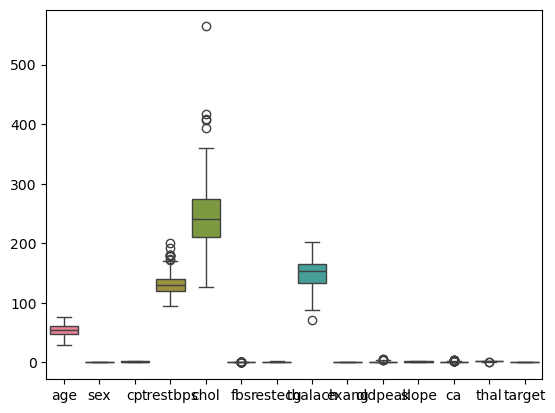

In [28]:
sns.boxplot(dfheart)

In [29]:
dfheart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

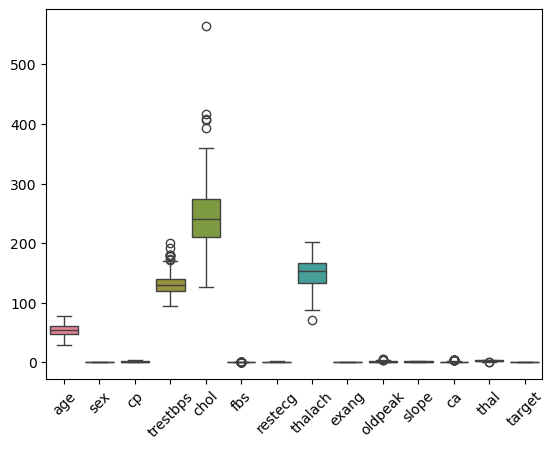

In [30]:
sns.boxplot(dfheart)
plt.xticks(rotation= 45)
plt.show()

In [31]:
cols = [ 'trestbps', 'chol', 'fbs',  'thalach', 'oldpeak',  'ca', 'thal', ]

In [32]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [33]:
for c in cols :
    sk = (dfheart[c]).skew().round()
    if sk == 0 or sk == -0:
        m = dfheart[c].mean()
        s = dfheart[c].std()
        lower = m - 3 * s
        upper = m + 3 * s
        dfheart[c] = dfheart[c].map(lambda x:lower if x < lower else upper if x > upper else x)
    else :
        q1 = dfheart[c].quantile(0.25)
        q3 = dfheart[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        up = q3 + (1.5 * iqr)
        dfheart[c] = dfheart[c].apply(lambda x : low if x < low else up if x > up else x)

<Axes: >

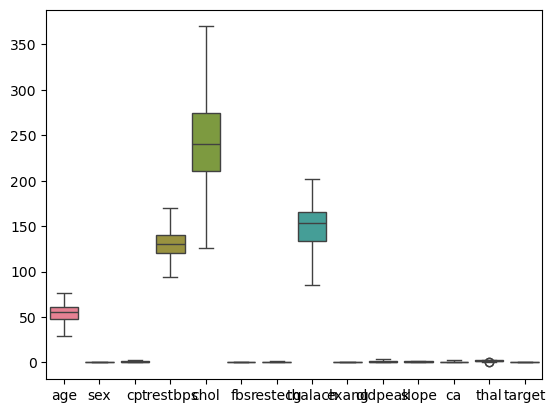

In [34]:
sns.boxplot(dfheart)


### Encoding

In [35]:
dfheart.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

### Imbalance

In [36]:
dfheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [37]:
dfheart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
dfheart['target'].unique()

array([1, 0], dtype=int64)

In [39]:
dfheart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

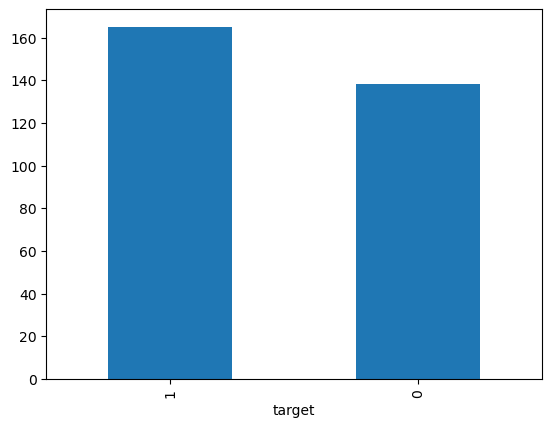

In [40]:
dfheart['target'].value_counts().plot(kind = "bar")

### Data Seperation

In [41]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1


In [42]:
dfheart.drop("target", axis = 1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


In [43]:
X = dfheart.drop("target", axis = 1)

In [44]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0


In [45]:
y = dfheart['target']

In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Data Splitting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20 , random_state = 2)

In [49]:
X.shape,X_train.shape,X_test.shape


((303, 13), (242, 13), (61, 13))

In [50]:
y.shape,y_train.shape,y_test.shape

((303,), (242,), (61,))

In [51]:
from sklearn.svm import SVC


In [52]:
svm_model = SVC()

In [53]:
svm_model

SVC()

In [54]:
svm_model.fit(X_train,y_train)

SVC()

In [55]:
svm_model.score(X_test,y_test)

0.6885245901639344

In [56]:
slist = []
for i in range(0,1000) :
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.20, random_state = i )
    svc = SVC()
    svc.fit(Xtrain,ytrain)
    s = svc.score(Xtest,ytest)
    slist.append(s)

m = max(slist)
print(m, end = " ==> ")
a = slist.index(m)
print(a)

0.8524590163934426 ==> 907


### Cross Validation

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree

DecisionTreeClassifier()

In [65]:
score = cross_val_score(dtree, X, y, cv = 20, n_jobs = -1)

In [66]:
score

array([0.8125    , 0.75      , 0.875     , 0.8       , 0.8       ,
       1.        , 0.73333333, 0.8       , 1.        , 0.86666667,
       0.6       , 0.46666667, 0.8       , 0.73333333, 0.53333333,
       0.73333333, 0.66666667, 0.66666667, 0.8       , 0.8       ])

In [67]:
score.mean()

0.7618750000000001